## Learning Outcomes
- Exploratory data analysis & preparing the data for model building. 
- Machine Learning - Supervised Learning Classification
  - Logistic Regression
  - Naive bayes Classifier
  - KNN Classifier
  - Decision Tree Classifier
  - Random Forest Classifier
  - Ensemble methods
- Training and making predictions using different classification models.
- Model evaluation

## Objective: 
- The Classification goal is to predict “heart disease” in a person with regards to different factors given. 

## Context:
- Heart disease is one of the leading causes of death for people of most races in the US. At least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. 
- Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Machine learning methods may detect "patterns" from the data and can predict whether a patient is suffering from any heart disease or not..

## Dataset Information

#### Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?datasetId=1936563&sortBy=voteCount
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. 

This dataset consists of eighteen columns
- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- BMI: Body Mass Index (BMI)
- Smoking: smoked at least 100 cigarettes in your entire life
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- Stroke:Ever had a stroke?
- PhysicalHealth: physical health, which includes physical illness and injury
- MentalHealth: for how many days during the past 30 days was your mental health not good?
- DiffWalking: Do you have serious difficulty walking or climbing stairs?
- Sex: male or female?
- AgeCategory: Fourteen-level age category
- Race: Imputed race/ethnicity value
- Diabetic: diabetes?
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- GenHealth: Would you say that in general your health is good, fine or excellent?
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
- Asthma: you had asthma?
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- SkinCancer: Ever had skin cancer?

### 1. Importing Libraries

In [4]:
pwd

'F:\\JupyterN'

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier

### 2. Load the dataset and display a sample of five rows of the data frame.

In [16]:
pwd

'F:\\JupyterN'

In [2]:
df=pd.read_csv("heart.csv")

### 3. Check the shape of the data (number of rows and columns). Check the general information about the dataframe using the .info() method.

In [3]:
df.shape

(319795, 18)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### 4. Check the statistical summary of the dataset and write your inferences.

In [4]:
 df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


In [7]:
df.describe(include='O')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


### 5. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any.

In [8]:
missing_values_percentage = df.isnull().mean() * 100
print("Percentage of missing values in each column:")
print(missing_values_percentage)

Percentage of missing values in each column:
HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64


### 6. Check if there are any duplicate rows. If any drop them and check the shape of the dataframe after dropping duplicates.

In [11]:
# Check for duplicate rows
duplicate_rows = df_cleaned.duplicated()
num_duplicates = duplicate_rows.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 18078


In [21]:
df.shape

(319795, 18)

In [12]:
# Drop duplicate rows
df_cleaned_no_duplicates = df_cleaned.drop_duplicates()

# Verify the shape of the dataframe after dropping duplicates
print("\nShape of the dataset after dropping duplicate rows:", df_cleaned_no_duplicates.shape)


Shape of the dataset after dropping duplicate rows: (301717, 18)


### 7. Check the distribution of the target variable (i.e. 'HeartDisease') and write your observations.

In [13]:
#check the distribution of the target variable 'HeartDisease'
heart_Disease_Distribution = df_cleaned_no_duplicates['HeartDisease'].value_counts()
heart_Disease_percentage = df_cleaned_no_duplicates['HeartDisease'].value_counts(normalize=True)*100

# Display the distribution
print("Distribution of 'HeartDisease':")
print(heart_Disease_Distribution)
print("\nPercentage distribution of 'HeartDisease':")
print(heart_Disease_percentage)

Distribution of 'HeartDisease':
HeartDisease
No     274456
Yes     27261
Name: count, dtype: int64

Percentage distribution of 'HeartDisease':
HeartDisease
No     90.964712
Yes     9.035288
Name: proportion, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_7908\3432372484.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease',data = df_cleaned_no_duplicates, palette='viridis')


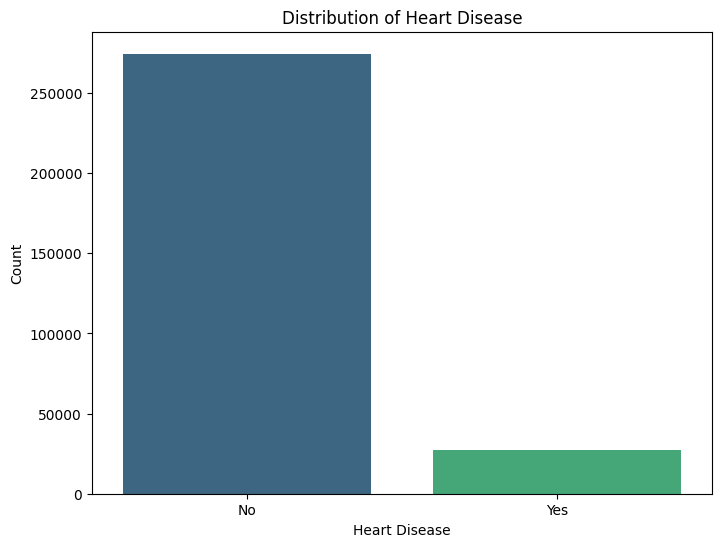

In [14]:
#Plot the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='HeartDisease',data = df_cleaned_no_duplicates, palette='viridis')
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

### 8. Visualize the distribution of the target column 'Heart disease' with respect to various categorical features and write your observations.

In [27]:
column_names = df.columns.tolist()
print(column_names)

['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']


### 9. Check the unique categories in the column 'Diabetic'. Replace 'Yes (during pregnancy)' as 'Yes' and 'No, borderline diabetes' as 'No'.

In [28]:
# Check unique categories in the 'Diabetic' column
unique_categories = df_cleaned_no_duplicates['Diabetic'].unique()
print("Unique categories in the 'Diabetic' Column before replacement:")
print(unique_categories)

Unique categories in the 'Diabetic' Column before replacement:
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']


In [29]:
# Replace values in the 'Diabetic' column
df_cleaned_no_duplicates.loc[:, 'Diabetic']  = df_cleaned_no_duplicates['Diabetic'].replace({
    'Yes (during pergency)': 'Yes',
    'No, borderline diabetes': 'No'
})

In [30]:
# Verify the replacement
unique_categories_after = df_cleaned_no_duplicates['Diabetic'].unique()
print("\nUnique categories in the 'Diabetic' column after replacement:")
print(unique_categories_after)


Unique categories in the 'Diabetic' column after replacement:
['Yes' 'No' 'Yes (during pregnancy)']


### 10. For the target column 'HeartDiease', Replace 'No' as 0 and 'Yes' as 1. 

In [31]:
df_cleaned_no_duplicates.loc[:,'HeartDisease'] = df_cleaned_no_duplicates['HeartDisease'].replace({
    'No':0,
    'Yes':1
})
print(df_cleaned_no_duplicates['HeartDisease'])

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 301717, dtype: object


C:\Users\HP\AppData\Local\Temp\ipykernel_7908\3526076905.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned_no_duplicates.loc[:,'HeartDisease'] = df_cleaned_no_duplicates['HeartDisease'].replace({


### 11. Label Encode the columns "AgeCategory", "Race", and "GenHealth". Encode the rest of the columns using dummy encoding approach.

In [32]:
#Define columns to label encode
object_type_variables = [i for i in df_cleaned_no_duplicates[["AgeCategory", "Race", "GenHealth"]] if df_cleaned_no_duplicates.dtypes[i] == object]
object_type_variables

le = LabelEncoder()

def encoder(df):
    for i in object_type_variables:
        q = le.fit_transform(df[i].astype(str))
        df[i] = q
        df[i] = df[i].astype(int)
encoder(df)

In [ ]:
df_cleaned_no_duplicates = pd.get_dummies(df_cleaned_no_duplicates, drop_first = True)

In [33]:
df.head(2)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,7,5,Yes,Yes,4,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,12,5,No,Yes,4,7.0,No,No,No


In [37]:
le = LabelEncoder()

# Apply label encoding to each boolean column
for column in bool_columns:
    df_cleaned_no_duplicates[column] = le.fit_transform(df_cleaned_no_duplicates[column])

# Check the updated DataFrame
print(df_cleaned_no_duplicates.head())

NameError: name 'bool_columns' is not defined

### 12. Store the target column (i.e.'HeartDisease') in the y variable and the rest of the columns in the X variable.

In [38]:
X = df_cleaned_no_duplicates.drop('HeartDisease_1', axis=1)
y = df_cleaned_no_duplicates['HeartDisease_1']

KeyError: "['HeartDisease_1'] not found in axis"

### 13. Split the dataset into two parts (i.e. 70% train and 30% test) and print the shape of the train and test data

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

NameError: name 'X' is not defined

### 14. Standardize the numerical columns using Standard Scalar approach for both train and test data.

In [42]:
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns

# Initialize StandardScaler
ss = StandardScaler()

X_train[numeric_columns] = ss.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = ss.transform(X_test[numeric_columns])

X_train.head(2)

NameError: name 'X_train' is not defined

In [43]:
X_test.head(2)

NameError: name 'X_test' is not defined

### 15. Write a function.
- i) Which can take the model and data as inputs.
- ii) Fits the model with the train data.
- iii) Makes predictions on the test set.
- iv) Returns the Accuracy Score.

In [ ]:
def fit_n_print(model, X_train, X_test, y_train, y_test:

model.fit(X_train, y_train)

pred = model.predict(X_test)

accuracy = accuracy_score(y_test, pred)

return accuracy

### 16. Use the function and train a Logistic regression, KNN, Naive Bayes, Decision tree, Random Forest, Adaboost, GradientBoost, and Stacked Classifier models and make predictions on test data and evaluate the models, compare and write your conclusions and steps to be taken in future in order to improve the accuracy of the model.

In [38]:
lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
gb = GradientBoostingClassifier()

estimators = [('rf' , rf),('knn' , knn), ('gb' , gb), ('adb', adb)]
sc = StackingClassifier(estimators, final_estimator=rf)

NameError: name 'GaussianNB' is not defined

In [47]:
result = pd.DataFrame(columns = ['Accuracy'])

for model, model_name in zip([lr, nb, knn, dt, rf, adb, gb, sc],
                             'Logistic Regression','Naive bayes', 'KNN', 'Decision tree','Random Forest', 'Ada Boost', 'Gradient Boost', 'Stacking']):

    result.loc[model_name] = fit_n_print(model,x_train, X_test, y_train, y_test)

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' on line 3 (2801682242.py, line 4)

In [13]:
result

NameError: name 'LogisticRegression' is not defined

### Conclusion

In [ ]:
• From EDA:-
People who smoke have higher chances of heart diesease than no smokers
■ Male are more prone to suffer from heart diseases as compared to females
People with age limit in between 55-75 has higher chances of getting heart diseases
If person has difficulty in walking or climbing stairs there is a high probability that he or she is suffering from some heart disease
■ There are higher chances of a person having heart disease if he does not have any kidney disease.
• From Model:-
We see that the best performing models are Gradient Boost, Adaboost, Logistic Regression and KNN with around 91% accuracy.
■ Please note that the target class is highly imbalanced So, accuracy does not holds good for imbalanced data. Accuracy becomes poor measure of evaluation for our classification model in this context.
■ We can further go with evaluating the models based on the different performance metrics such as presicion, recall and F1 score and choose the model accordingly.
■ Further we can apply sampling techniques and try to balance the data and build models based on that data will increase our model performance, Kindly refer to this link to know how deal with imbalanced data https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class- imbalance-in-machine-learning/
■ Also, we can tune the hyperparameters and find the best set of hyperparameters and building the models based on those will increase the classification performance of the model.

----
## Happy Learning:)
----